In [1]:
import numpy as np
from numpy.linalg import norm
import gensim.downloader as api

# Load pre-trained word vectors
print("Loading pre-trained word vectors...")
word_vectors = api.load("word2vec-google-news-300")  # ~1.5GB model

# Function to perform vector arithmetic and find similar words
def explore_word_relationships(word1, word2, word3):
    try:
        # Get vectors for the input words
        vec1 = word_vectors[word1]
        vec2 = word_vectors[word2]
        vec3 = word_vectors[word3]

        # Perform vector arithmetic: word1 - word2 + word3
        result_vector = vec1 - vec2 + vec3

        # Find the most similar words to the resulting vector
        similar_words = word_vectors.similar_by_vector(result_vector, topn=10)

        # Exclude input words from the results
        input_words = {word1, word2, word3}
        filtered_words = [(word, similarity) for word, similarity in similar_words if word not in input_words]

        print(f"\nWord Relationship: {word1} - {word2} + {word3}")
        print("Most similar words to the result (excluding input words):")
        for word, similarity in filtered_words[:5]:  # Show top 5 results
            print(f"{word}: {similarity:.4f}")

    except KeyError as e:
        print(f"Error: {e} not found in the vocabulary.")


# Function to analyze the similarity between two words
def analyze_similarity(word1, word2):
    try:
        similarity = word_vectors.similarity(word1, word2)
        print(f"\nSimilarity between '{word1}' and '{word2}': {similarity:.4f}")
    except KeyError as e:
        print(f"Error: {e} not found in the vocabulary.")


# Function to find the most similar words to a given word
def find_most_similar(word):
    try:
        similar_words = word_vectors.most_similar(word, topn=5)
        print(f"\nMost similar words to '{word}':")
        for similar_word, similarity in similar_words:
            print(f"{similar_word}: {similarity:.4f}")
    except KeyError as e:
        print(f"Error: {e} not found in the vocabulary.")



Loading pre-trained word vectors...


In [2]:

# Example word relationships to explore
explore_word_relationships("king", "man", "woman")
explore_word_relationships("paris", "france", "germany")
explore_word_relationships("apple", "fruit", "carrot")


Word Relationship: king - man + woman
Most similar words to the result (excluding input words):
queen: 0.7301
monarch: 0.6455
princess: 0.6156
crown_prince: 0.5819
prince: 0.5777

Word Relationship: paris - france + germany
Most similar words to the result (excluding input words):
berlin: 0.4838
german: 0.4695
lindsay_lohan: 0.4536
switzerland: 0.4468
heidi: 0.4445

Word Relationship: apple - fruit + carrot
Most similar words to the result (excluding input words):
carrots: 0.5700
proverbial_carrot: 0.4578
Carrot: 0.4159
Twizzler: 0.4074
peppermint_candy: 0.4074


In [4]:

# Example similarity analysis
analyze_similarity("cat", "dog")
analyze_similarity("computer", "keyboard")
analyze_similarity("music", "art")


Similarity between 'cat' and 'dog': 0.7609

Similarity between 'computer' and 'keyboard': 0.3964

Similarity between 'music' and 'art': 0.4010


In [5]:

# Example: Find most similar words
find_most_similar("happy")
find_most_similar("sad")
find_most_similar("technology")


Most similar words to 'happy':
glad: 0.7409
pleased: 0.6632
ecstatic: 0.6627
overjoyed: 0.6599
thrilled: 0.6514

Most similar words to 'sad':
saddening: 0.7273
Sad: 0.6611
saddened: 0.6604
heartbreaking: 0.6574
disheartening: 0.6507

Most similar words to 'technology':
technologies: 0.8332
innovations: 0.6231
technological_innovations: 0.6102
technol: 0.6047
technological_advancement: 0.6036


Optional

In [8]:
def show_analogy_examples():
    """Demonstrates classic word embedding analogies"""
    examples = [
        ("king", "man", "woman", "queen"),
        ("India", "Pakistan", "Kashmir", "China"),
        ("walked", "walk", "run", "ran"),
        ("big", "bigger", "small", "smaller")
    ]
    
    print("\n=== Classic Word Vector Analogies ===")
    for w1, w2, w3, expected in examples:
        try:
            result = word_vectors.most_similar(positive=[w1, w3], negative=[w2])[0][0]
            print(f"{w1} - {w2} + {w3} = {result} (expected: {expected})")
        except KeyError as e:
            print(f"Couldn't process analogy with missing word: {e}")

def nearest_neighbors_demo(word, n=5):
    """Shows nearest neighbors with distances in vector space"""
    try:
        similar_words = word_vectors.most_similar(word, topn=n)
        print(f"\nNearest neighbors to '{word}' in embedding space:")
        for i, (similar_word, similarity) in enumerate(similar_words, 1):
            distance = norm(word_vectors[word] - word_vectors[similar_word])
            print(f"{i}. {similar_word:15s} cosine similarity: {similarity:.3f} distance: {distance:.3f}")
    except KeyError as e:
        print(f"Error: {e} not found in the vocabulary.")

def vector_components_analysis(word):
    """Shows the magnitude and some component values of a word vector"""
    try:
        vec = word_vectors[word]
        print(f"\nVector analysis for '{word}':")
        print(f"Vector shape: {vec.shape}")  # Should be (300,)
        print(f"Vector magnitude (L2 norm): {norm(vec):.3f}")
        print("First 10 components:")
        for i, val in enumerate(vec[:10]):
            print(f"Dimension {i+1}: {val:.4f}")
        print("... (300 total dimensions)")
    except KeyError as e:
        print(f"Error: {e} not found in the vocabulary.")

In [9]:
show_analogy_examples()


=== Classic Word Vector Analogies ===
king - man + woman = queen (expected: queen)
India - Pakistan + Kashmir = Sikkim (expected: China)
walked - walk + run = ran (expected: ran)
big - bigger + small = large (expected: smaller)


In [10]:
word = "Crazy"
nearest_neighbors_demo(word)
vector_components_analysis(word)
# Show classic word vector analogies



Nearest neighbors to 'Crazy' in embedding space:
1. Doin            cosine similarity: 0.566 distance: 2.994
2. Funky           cosine similarity: 0.543 distance: 2.797
3. Mad             cosine similarity: 0.542 distance: 2.812
4. Bash_Compactor  cosine similarity: 0.542 distance: 2.372
5. Insane          cosine similarity: 0.541 distance: 3.062

Vector analysis for 'Crazy':
Vector shape: (300,)
Vector magnitude (L2 norm): 2.812
First 10 components:
Dimension 1: -0.0229
Dimension 2: -0.3867
Dimension 3: -0.1436
Dimension 4: 0.0182
Dimension 5: -0.0625
Dimension 6: -0.0417
Dimension 7: -0.0383
Dimension 8: -0.1504
Dimension 9: 0.0742
Dimension 10: -0.0625
... (300 total dimensions)


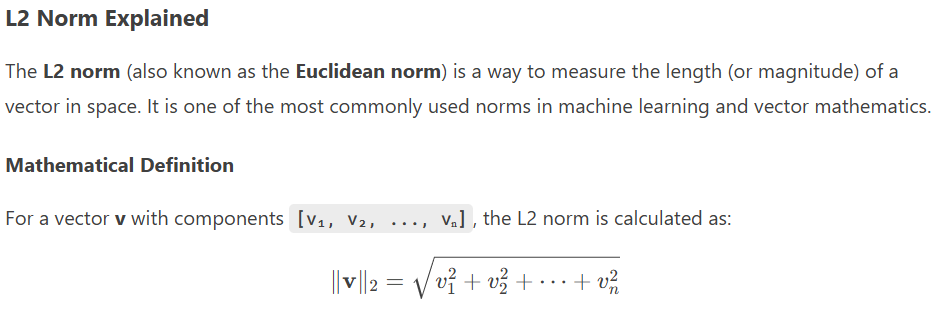

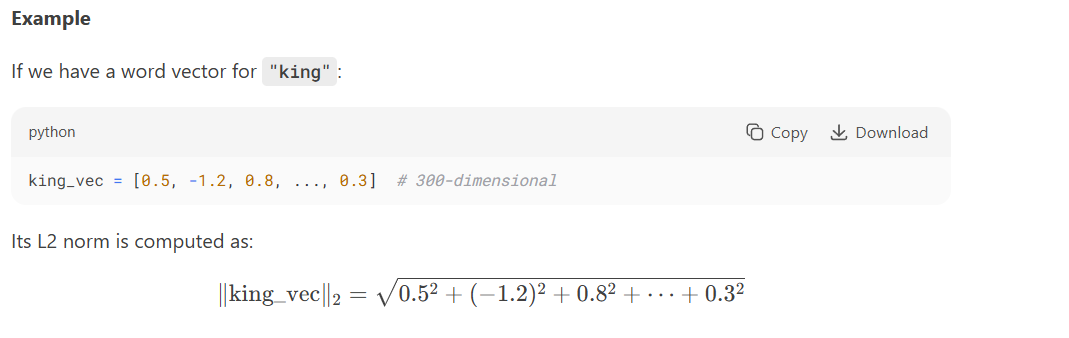

In [11]:
import gensim.downloader as api

# Load different models
word2vec = api.load("word2vec-google-news-300")  # Word2Vec
glove = api.load("glove-wiki-gigaword-300")      # GloVe
fasttext = api.load("fasttext-wiki-news-subwords-300")  # FastText

# Compare similarities
print("Word2Vec Similarity (king, queen):", word2vec.similarity("king", "queen"))
print("GloVe Similarity (king, queen):", glove.similarity("king", "queen"))
print("FastText Similarity (king, queen):", fasttext.similarity("king", "queen"))

# Word arithmetic: king - man + woman ≈ queen
print("\nWord2Vec Analogy:", word2vec.most_similar(positive=["king", "woman"], negative=["man"], topn=1))
print("GloVe Analogy:", glove.most_similar(positive=["king", "woman"], negative=["man"], topn=1))

[==================================================] 100.0% 376.1/376.1MB downloaded
[==================================================] 100.0% 958.5/958.4MB downloaded
Word2Vec Similarity (king, queen): 0.6510957
GloVe Similarity (king, queen): 0.6336469
FastText Similarity (king, queen): 0.7704246

Word2Vec Analogy: [('queen', 0.7118193507194519)]
GloVe Analogy: [('queen', 0.6713277101516724)]
